In [244]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#from matplotlib.pyplot import figure

print("matplotlib version: {}".format(matplotlib.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))

#read the data file
path = './30k_data.csv'
%time df = pd.read_csv(path)


matplotlib version: 2.2.2
mglearn version: 0.1.6
CPU times: user 289 ms, sys: 41 ms, total: 330 ms
Wall time: 335 ms


In [245]:
print("df.shape =", df.shape)
df2 = df[['Call Type','Location']]
df2 = df2.rename(index=str, columns={"Call Type":"callType"})
print("df2.shape =", df2.shape)
df2 = df2.copy()

df2.loc[:,'tmpcol'] = df2['Location'].map(lambda x: x.lstrip('(').rstrip(')'))

df2['LAT'] = df2['tmpcol'].str.split(',').str[0].astype(float)
df2['LON'] = df2['tmpcol'].str.split(',').str[1].astype(float)*-1
#df2['callType'] = df2['callType'].str

df2 = df2.drop('tmpcol',1)
df2 = df2.drop('Location',1)
print("\n df2.types",df2.dtypes)
df2






df.shape = (30000, 34)
df2.shape = (30000, 2)

 df2.types callType     object
LAT         float64
LON         float64
dtype: object


,callType,LAT,LON
0,Medical Incident,37.798711,122.435888
1,Medical Incident,37.784199,122.414268
2,Medical Incident,37.776683,122.454983
3,Medical Incident,37.782603,122.408539
4,Medical Incident,37.774653,122.405118
5,Structure Fire,37.790565,122.405574
6,Medical Incident,37.767070,122.413260
7,Medical Incident,37.780699,122.403921
8,Medical Incident,37.747006,122.492022
9,Medical Incident,37.775307,122.457443


Text(0.5,1,'Locations of all calls 30k records')

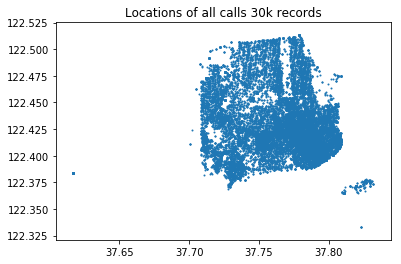

In [246]:
plt.scatter(df2.LAT,df2.LON,s=1)
plt.title("Locations of all calls 30k records")

shape:  (3848, 3)


Text(0.5,1,'Structure Fire calls 3848 records')

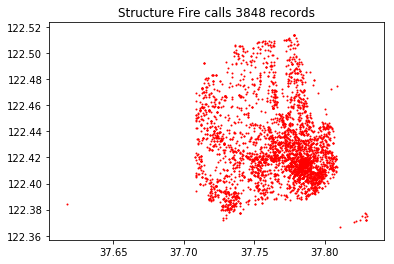

In [247]:
df3 = df2.loc[df2['callType'] == "Structure Fire"]
print("shape: ",df3.shape)
plt.scatter(df3.LAT,df3.LON,s=1,color='red')
plt.title("Structure Fire calls 3848 records")

shape:  (164, 3)


Text(0.5,1,'Water Resuce calls 164 records')

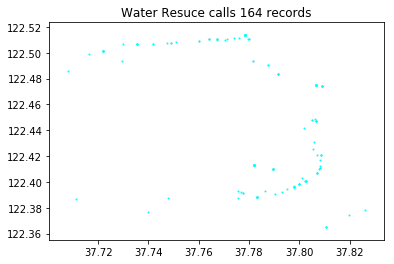

In [248]:

df4 = df2.loc[df2['callType'] == "Water Rescue"]
print("shape: ",df4.shape)
plt.scatter(df4.LAT,df4.LON,s=1,color='aqua')
plt.title("Water Resuce calls 164 records")






shape:  (1227, 3)


Text(0.5,1,'Traffic Collision calls ')

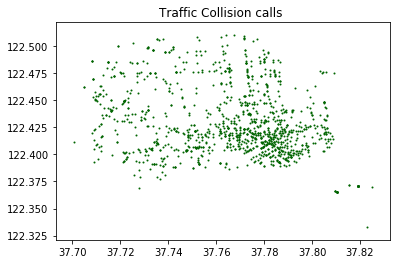

In [249]:
df5 = df2.loc[df2['callType'] == "Traffic Collision"]
print("shape: ",df5.shape)
plt.scatter(df5.LAT,df5.LON,s=1,color='darkgreen')
plt.title("Traffic Collision calls ")


Text(0.5,1,'Fire calls')

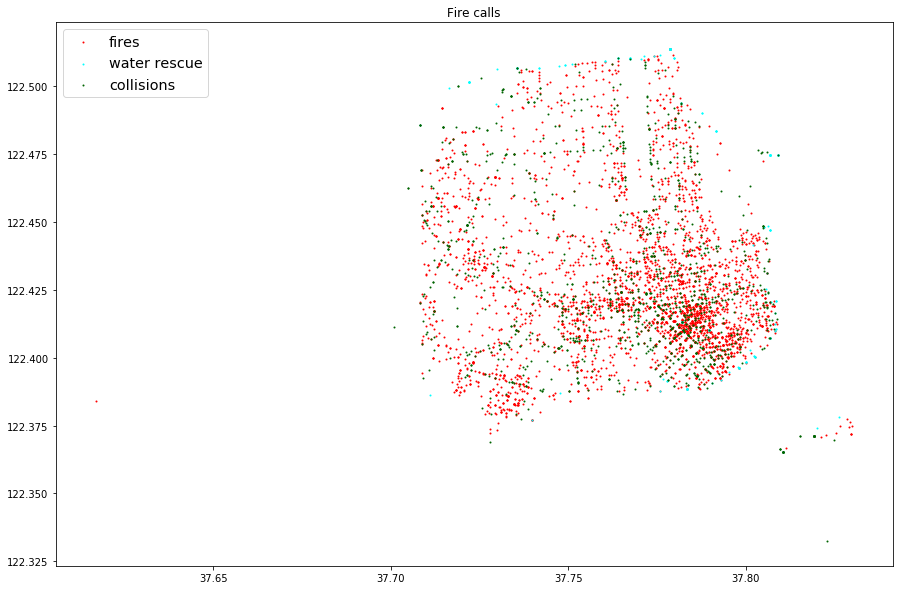

In [250]:
plt.figure(figsize=(15,10))
#plt.subplot(111)
#plt.scatter(df2.LAT,df2.LON,s=1)
#plt.title("Locations of all calls 30k records")

#plt.subplot(111)
df3 = df2.loc[df2['callType'] == "Structure Fire"]
plt.scatter(df3.LAT,df3.LON,s=1, color='red', label="fires")
#plt.title("Structure Fire calls 3848 records")

#plt.subplot(111)
plt.scatter(df4.LAT,df4.LON,s=1,color='aqua', label='water rescue')
#plt.title("Water Resuce calls 164 records")

#plt.subplot(111)
plt.scatter(df5.LAT,df5.LON,s=1,color='darkgreen', label="collisions")
#plt.title("Traffic Collision calls ")

plt.legend(loc='upper left',ncol=1,fontsize='x-large')
plt.title("Fire calls")



[1 2 0 ... 0 0 1]


array([[ 37.78423738, 122.4136315 ],
       [ 37.75817517, 122.47480618],
       [ 37.73484396, 122.41757624]])

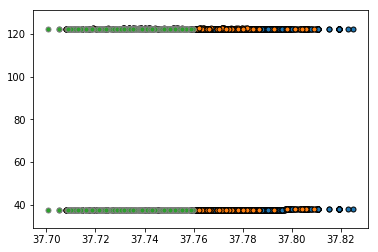

In [263]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import numpy as np
import mglearn

X = df5.drop('callType',1).values




km = KMeans(n_clusters=3).fit(X)

print(km.predict(X))

mglearn.discrete_scatter(X[:,0],X[:,], km.labels_,markers='.')
'''

mglearn.discrete_scatter(
    km.cluster_centers_[:, 0], 
    km.cluster_centers_[:, 1], 
    [0, 1, 2],
    markers='^', 
    markeredgewidth=1)
'''

km.cluster_centers_





